In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import os
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df = pd.read_csv(r"C:\Users\faval\Desktop\Ironhack\DataAnalytics\final_project\data\clean\clean_idealista_output_etl.csv", low_memory=False)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Exploratory Data Analysis (EDA)


In [ ]:
# CAST COLUMNS AS DATE
df['ad_activationdate'] = pd.to_datetime(df['ad_activationdate'], format='%Y-%m-%d')

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

**CORRELATION MATRIX**

In [ ]:
correlation_matrix = numerical_df.corr()
# Set up the figure
plt.figure(figsize=(8, 6))
# Draw the heatmap with the mask and a green color palette
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5)
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

In [ ]:
plt.savefig(r"C:\Users\faval\Desktop\Ironhack\DataAnalytics\final_project\images\correlation_matrix.png", dpi=300, bbox_inches='tight')

In [ ]:
# Specifically check correlation of features with the target variable
target_correlation = correlation_matrix['ad_price'].sort_values(ascending=False)
print("Correlation of features with house price:")
print(target_correlation)

**BOXPLOT FOR PRICE**

In [ ]:
# Sort the dataframe by province name alphabetically
df_sorted = df.sort_values('ad_province')
# Create the boxplot
fig = px.box(df_sorted, 
             y='ad_province', 
             x='ad_price', 
             title='Distribution of Prices by Province',
             labels={'ad_price': 'Ad Price', 'ad_province': 'Province'},
             category_orders={'ad_province': df_sorted['ad_province'].unique()})  # Ensure consistent order based on sorted values
# Update layout with increased size
fig.update_layout(
    width=2000,  # Increase the width
    height=2000,  # Increase the height
    xaxis_title='Ad Price',
    yaxis_title='Province',
    xaxis=dict(range=[35000, 700000]),  # Set x-axis limits
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    title_x=0.5)
# Show the plot
fig.show()

**PRICE DISTRIBUTION**

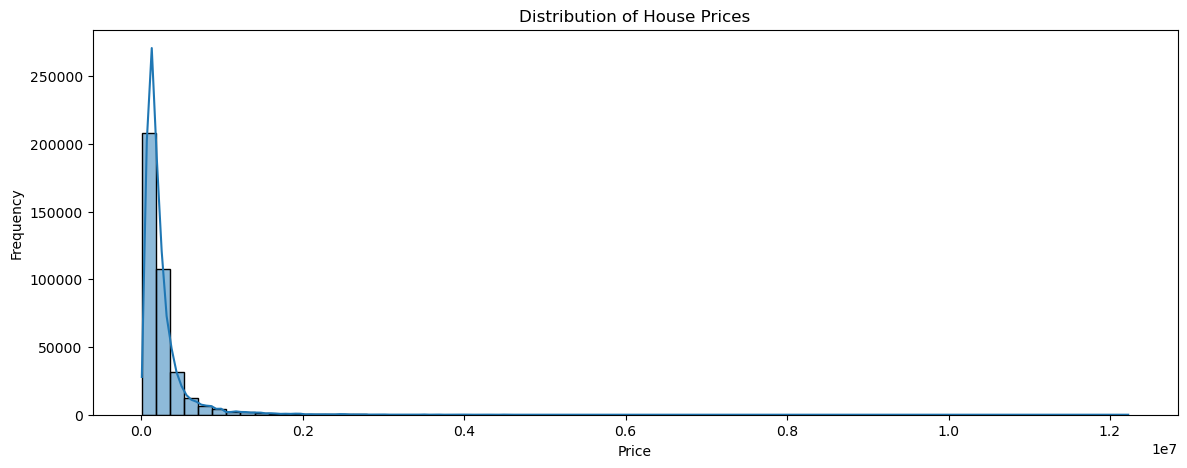

In [37]:
# Visualize the distribution of the target variable (house price)
plt.figure(figsize=(14, 5))
sns.histplot(df['ad_price'], bins=70, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Generate summary statistics for numerical features
summary_statistics = df.describe()
print(summary_statistics)
# Get a summary of categorical features
categorical_summary = df.describe(include=['object', 'category'])
print(categorical_summary)

**HANDLING OUTLIERS** Calculate the 99th Percentile Value. 
Cap the values above this threshold.

In [41]:
percentile_99 = df['ad_price'].quantile(0.99)
df['ad_price_cap'] = df['ad_price'].where(df['ad_price'] <= percentile_99, percentile_99)
#Check the effect of capping
print("Original Max Price:", df['ad_price'].max())
print("Capped Max Price:", df['ad_price_cap'].max())

Original Max Price: 12226000.0
Capped Max Price: 1600000.0


**BOX PLOT CAPPED PRICE**

In [ ]:
# Sort the dataframe by province name alphabetically
df_sorted = df.sort_values('ad_province')
# Create the boxplot
fig = px.box(df_sorted, 
             y='ad_province', 
             x='ad_price_cap', 
             title='Distribution of Prices by Province',
             labels={'ad_price_cap': 'Ad Price Cap', 'ad_province': 'Province'},
             category_orders={'ad_province': df_sorted['ad_province'].unique()})  # Ensure consistent order based on sorted values
# Update layout with increased size
fig.update_layout(
    width=2000,  # Increase the width
    height=2000,  # Increase the height
    xaxis_title='Ad Price Cap',
    yaxis_title='Province',
    xaxis=dict(range=[35000, 700000]),  # Set x-axis limits
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    title_x=0.5)
# Show the plot
fig.show()

**CAPPED PRICE DISTRIBUTION**

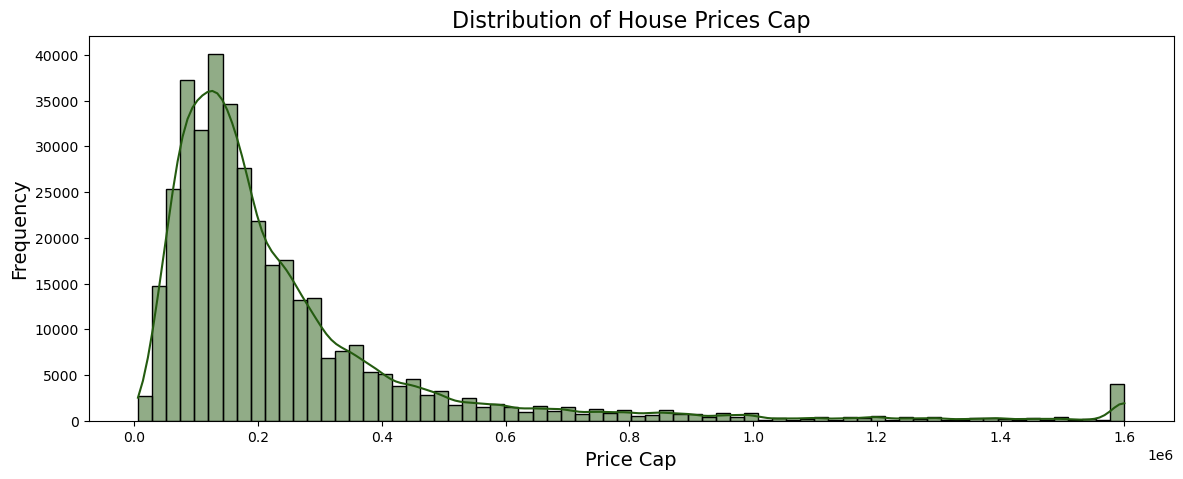

In [49]:
# Set the size of the plot
plt.figure(figsize=(14, 5))

# Use a green color palette for the histogram
sns.histplot(df['ad_price_cap'], bins=70, kde=True, color='#245b10')

# Set the title and labels
plt.title('Distribution of House Prices Cap', fontsize=16)
plt.xlabel('Price Cap', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

**SKEWNESS**

In [ ]:
# Calculate skewness of the target column
skewness = df['ad_price_cap'].skew()
print("Skewness of ad_price_cap:", skewness)

3.08 indicates a significant positive skew in your target variable

**LOG TRANSFORMATION**

In [51]:
# Step 1: Apply log transformation (adding 1 to avoid log(0))
df['ad_price_cap_log'] = np.log(df['ad_price_cap'] + 1)

In [53]:
# Step 2: Check the skewness of the transformed target variable
transformed_skewness = df['ad_price_cap_log'].skew()
print("Skewness after log transformation:", transformed_skewness)

Skewness after log transformation: 0.32376388003787443


**LOG TRANSFORMED PRICE DISTRIBUTION**

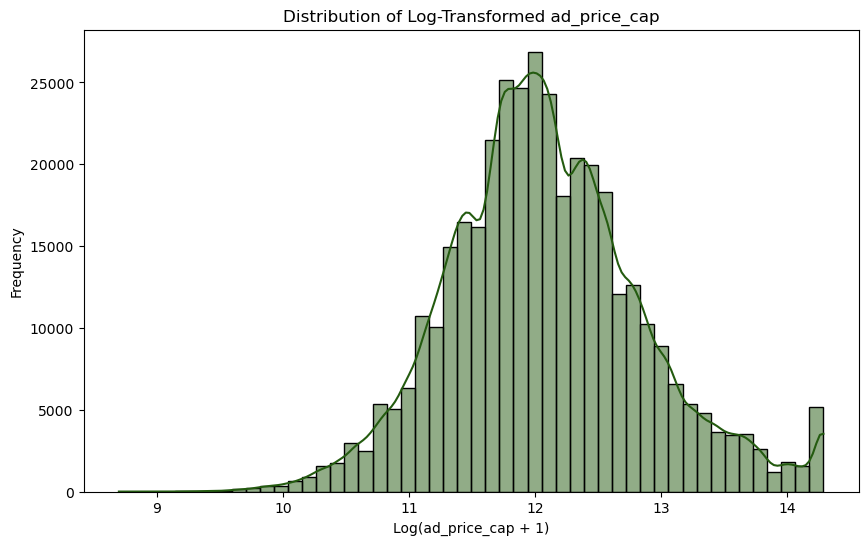

In [55]:
# Histogram of the log-transformed variable
plt.figure(figsize=(10, 6))
sns.histplot(df['ad_price_cap_log'], bins=50, kde=True, color='#245b10')
plt.title('Distribution of Log-Transformed ad_price_cap')
plt.xlabel('Log(ad_price_cap + 1)')
plt.ylabel('Frequency')
plt.show()

**PEARSON AND SPEARMAN**

In [ ]:
# Step: Perform Pearson's correlation test between 'ad_area' and 'ad_price_cap'
correlation_coef, p_value = pearsonr(df['ad_area'], df['ad_price_cap'])

# Print the results
print("Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant correlation between ad_area and ad_price_cap (p < 0.05).")
else:
    print("There is no significant correlation between ad_area and ad_price_cap (p >= 0.05).")

In [ ]:
# Step: Perform Spearman's correlation test between 'ad_area' and 'ad_price_cap'
correlation_coef, p_value = spearmanr(df['ad_price'], df['ad_price_cap'])

# Print the results
print("Spearman Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant correlation between ad_area and ad_price_cap (p < 0.05).")
else:
    print("There is no significant correlation between ad_area and ad_price_cap (p >= 0.05).")

**MIN-MAX SCALING**

In [ ]:
columns_to_min_max = ['ad_area', 'ad_roomnumber', 'ad_bathnumber', 'ad_floornumber']

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
# Fit and transform the selected columns
df_scaled = df.copy()  # Create a copy of the original DataFrame
df_scaled[columns_to_min_max] = min_max_scaler.fit_transform(df[columns_to_min_max])

In [ ]:
# Store the min and max values
scaler_min = min_max_scaler.data_min_  # Minimum values for each feature
scaler_max = min_max_scaler.data_max_  # Maximum values for each feature

# Create a dictionary to store the min and max for ease of access
min_max_values = {feature: (scaler_min[i], scaler_max[i]) for i, feature in enumerate(columns_to_min_max)}

# Now, 'min_max_values' contains min and max for each scaled feature
print("Stored Min and Max Values:")
print(min_max_values)

**HANDLING BOOLEAN COLUMNS**

In [ ]:
# List of Boolean columns to transform
boolean_columns = [
    'ad_newconstruction',
    'ad_hasgarden',
    'ad_hasparkingspace',
    'ad_hasswimmingpool',
    'ad_haslift',
    'ad_hasterrace',
    'ad_isintopfloor']

# Replace True/False with 1/0 for each specified Boolean column
for col in boolean_columns:
    df_scaled[col] = df_scaled[col].astype(int)

In [ ]:
# List of columns to drop
columns_to_drop = [
    'ad_town',
    'ad_operation',
    'ad_typology',
    'ad_price',
    'ad_activationdate',
    'ad_constructionyear',
    'ad_latitude',
    'ad_longitude',
    'adstats_contactsbyemail',
    'adstats_savedasfavorite',
    'adstats_sendtofriend',
    'adstats_visits',
    'ad_price_cap']
df_scaled = df_scaled.drop(columns=columns_to_drop)

**CAST POSTALCODE AS INTEGER**

In [ ]:
df_scaled['ad_postalcode'] = df_scaled['ad_postalcode'].replace(['Desconocido', 'ad200', 'ad400', 'ad500'], pd.NA)
df_scaled = df_scaled.dropna(subset=['ad_postalcode'])
df_scaled['ad_postalcode'] = df_scaled['ad_postalcode'].astype(int)

**MAPPING PROVINCES**

In [ ]:
#transform provinces into labels
unique_provinces = df_scaled['ad_province'].unique()
sorted_provinces = sorted(unique_provinces)
province_mapping = {province: index + 1 for index, province in enumerate(sorted_provinces)}
df_provinces = pd.DataFrame(list(province_mapping.items()), columns=['Province', 'Code'])

In [ ]:
#mapping provinces in df_ml
df_scaled['ad_province'] = df_scaled['ad_province'].map(province_mapping)

**SAVE PROVINCES MAPPING**

In [ ]:
save_path = r'C:\Users\faval\Desktop\Ironhack\DataAnalytics\final_project\data\clean'
file_name = 'df_provinces_mapping.csv'
full_path = os.path.join(save_path, file_name)
df_provinces.to_csv(full_path, index=False, encoding='utf-8')

In [ ]:
df_scaled.info()

In [ ]:
df_scaled.head()

### SAVE TRANSFORMED DATASET

In [ ]:
save_path = r'C:\Users\faval\Desktop\Ironhack\DataAnalytics\final_project\data\clean'
file_name = 'transformed_idealista_output_etl.csv'
full_path = os.path.join(save_path, file_name)
df_scaled.to_csv(full_path, index=False, encoding='utf-8')